# **Value Iteration Algorithm**

---
---
Hanin HAMDI

Ahmed Yassine HAMMAMI

In [1]:
import numpy as np 
from math import *

In [2]:
def CLOSE_ENOUGHT(a,b):
  ''' 
  This function decides whether b converges into a or not based on RMSE 
  '''
  RMSE = 0
  for index in range(len(a)):
    RMSE += (a[index]-b[index])**2
  RMSE = sqrt(RMSE)/len(a)
  return RMSE < 10**(-4)

In [3]:
def MAX(L): 
  ''' This function determines the max of a list L and arg max of the same list
  '''
  max = L[0]
  arg_max = 0
  for i in range(1,len(L)):
    if L[i] > max :
      max = L[i]
      arg_max = i
  return [max,arg_max]

In [24]:
def VALUE_ITERATION(T,R,gamma,pi_matrix):
  '''
  This function implements the value iteration algorithm.
  Inputs : T : transition matrixes, each matrix defines transition in case of one action
           R : rewards matrix 
           gamma : the discounted factor
           pi_initial : initial policy 
  Output : U : utility matrix 
           pi_optimal : policy matrix, contains the optimal action to take at each iteration
  Local variables : U : utility, initially equal to R 
                    U1 : utility 
                    V : determines sum(Tij.U(j)) for each action a 
  Number of actions = length(T)

  '''
  U = np.array(R)
  U1 = np.array(U)
  pi_optimal = np.array(pi_matrix)
  pi1_optimal = np.array(pi_matrix)
  while True :
    U = np.array(U1)
    pi_optimal = np.array(pi1_optimal)
    for i in range(len(U)):
      V = []
      for action in range(len(T)):
        sum = 0
        for j in range(len(U)):
          sum += T[action][i][j]*U[j]
        V.append(sum)
      best = gamma*MAX(V)[0]
      # update of the policy when we didn't reach the optimal policy 
      pi1_optimal[i] = MAX(V)[1]
      # update of the utility 
      U1[i] = R[i] + best
    if CLOSE_ENOUGHT(U,U1):
      break
  return [U,pi_optimal]

## Example 
We will test the example given by the text of the TP2

In [27]:
''' States : s0,s1,s2 and s3
    Actions : a0,a1 and a2 
''' 
''' R definition 
'''
R = np.array([0.0,0,1,10.0])
''' Fixing x, y and gamma 
'''
x = 0.25
y = 0.25
gamma = 0.9
''' T definition 
'''
T_a0 = np.array([[0.0,0.0,0.0,0.0],
                [0.0,1-x,0.0,x],
                [1-y,0.0,0.0,y],
                [1.0,0.0,0.0,0.0]])
T_a1 = np.array([[0.0,1.0,0.0,0.0],
                [0.0,0.0,0.0,0.0],
                [0.0,0.0,0.0,0.0],
                [0.0,0.0,0.0,0.0]])
T_a2 = np.array([[0.0,0.0,1.0,0.0],
                [0.0,0.0,0.0,0.0],
                [0.0,0.0,0.0,0.0],
                [0.0,0.0,0.0,0.0]])
T = [T_a0,T_a1,T_a2]
''' Initial action for each state 
    1 refers to a1, 0 refers to a0 and 2 refers to a2
'''
pi_matrix = np.array([2,0,0,0])

In [28]:
[U,pi_optimal] = np.array(VALUE_ITERATION(T,R,gamma,pi_matrix))
print('OPTIMAL UTILITY \n')
print(U)

OPTIMAL UTILITY 

[14.18376816 15.7599503  15.69602736 22.76520424]


### let's now determine the optimal policy $\pi$

In [30]:
print('OPTIMAL POLICY \n')
print(pi_optimal)

OPTIMAL POLICY 

[1. 0. 0. 0.]


### Now, we've added some lines to the function VALUE_ITERATION in order to memorize the utilies calculated at the end of each iteration, in order to follow the variation of the utility of each state at each step of the exploration. 

In [31]:
def VALUE_ITERATION_MODIFIED(T,R,gamma,pi_matrix):
  '''
  This function implements the value iteration algorithm.
  Inputs : T : transition matrixes, each matrix defines transition in case of one action
           R : rewards matrix 
           gamma : the discounted factor
           pi_initial : initial policy 
  Output : U : utility matrix 
           pi_optimal : policy matrix, contains the optimal action to take at each iteration
  Local variables : U : utility, initially equal to R 
                    U1 : utility 
                    V : determines sum(Tij.U(j)) for each action a 
  Number of actions = length(T)

  '''
  U_memorized = []
  U = np.array(R)
  U1 = np.array(U)
  pi_optimal = np.array(pi_matrix)
  pi1_optimal = np.array(pi_matrix)
  while True :
    U = np.array(U1)
    U_memorized.append(U)
    pi_optimal = np.array(pi1_optimal)
    for i in range(len(U)):
      V = []
      for action in range(len(T)):
        sum = 0
        for j in range(len(U)):
          sum += T[action][i][j]*U[j]
        V.append(sum)
      best = gamma*MAX(V)[0]
      # update of the policy when we didn't reach the optimal policy 
      pi1_optimal[i] = MAX(V)[1]
      # update of the utility 
      U1[i] = R[i] + best
    if CLOSE_ENOUGHT(U,U1):
      break
  return [U,pi_optimal, U_memorized]

In [32]:
[U,pi_optimal,U_memorized] = np.array(VALUE_ITERATION_MODIFIED(T,R,gamma,pi_matrix))
U_memorized = np.array(U_memorized)
V0 = U_memorized[:,0]
V1 = U_memorized[:,1]
V2 = U_memorized[:,2]
V3 = U_memorized[:,3]

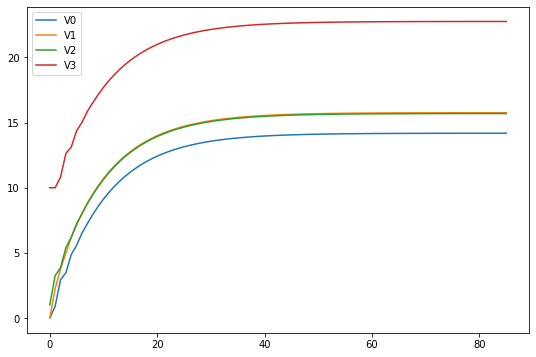

In [33]:
# Plot of V0, V1, V2 and V3
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(9, 6))
plt.plot(V0)
plt.plot(V1)
plt.plot(V2)
plt.plot(V3)
plt.legend(['V0','V1','V2','V3'])
plt.show()

* On remarque qu'aux 10 premières itérations, $V_1$ (l'amélioration qu'on obtient si l'on réalise l'action $a_1$ à partir de l'état $s_0$) est inférieure à $V_2$ (l'amélioration qu'on obtient si l'on réalise l'action $a_2$ à partir de l'état $s_0$). Par contre, à partir de la dixième itération, l'algorithme qui calcule l'utilité commence à converger encore plus et $V_1$ devient à peine supérieure à $V_2$ (une différence de l'ordre de $10^{-1}$.

* De plus, on remarque aussi que la matrice $\pi$ converge un bon temps avant la matrice de l'utilité U, ceci est un inconvénient de l'algorithme du Value Iteration.